# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

# Hide FutureWarning warnings
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis (EDA)

In [2]:
data = pd.read_csv('data/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Data reordered to change the price location

reordered_data = list(range(1, data.shape[1])) + [0]  # Move first column to the end
data = data.iloc[:, reordered_data]  # Use the correct variable name

data.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          545 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  545 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.describe()

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [6]:
data.isnull().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

In [7]:
# Delete the column prefarea ,stories
data.drop(['prefarea', 'stories'], axis=1 , inplace=True )
data.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,price
0,7420,4,2,yes,no,no,no,yes,2,furnished,13300000
1,8960,4,4,yes,no,no,no,yes,3,furnished,12250000
2,9960,3,2,yes,no,yes,no,no,2,semi-furnished,12250000
3,7500,4,2,yes,no,yes,no,yes,3,furnished,12215000
4,7420,4,1,yes,yes,yes,no,yes,2,furnished,11410000



# Data Visualization

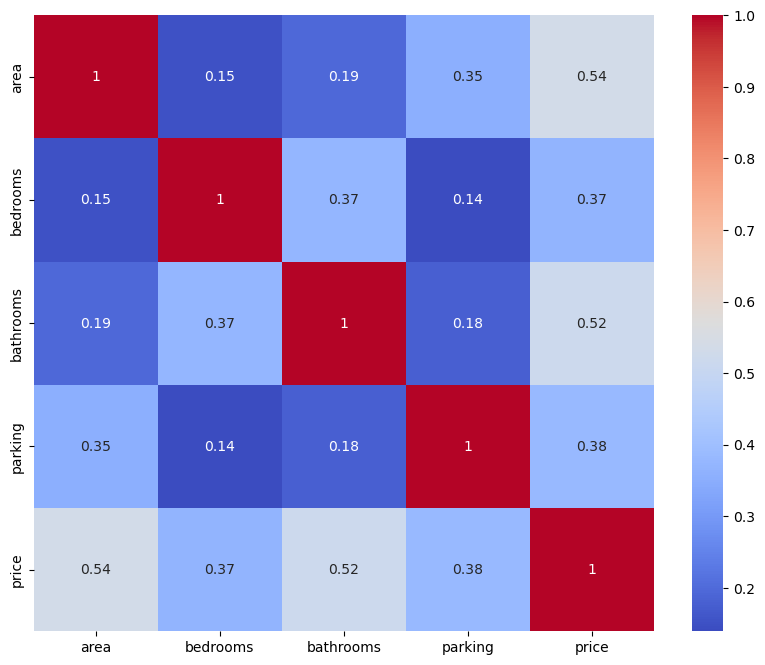

In [8]:
# Correlation Heatmap
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

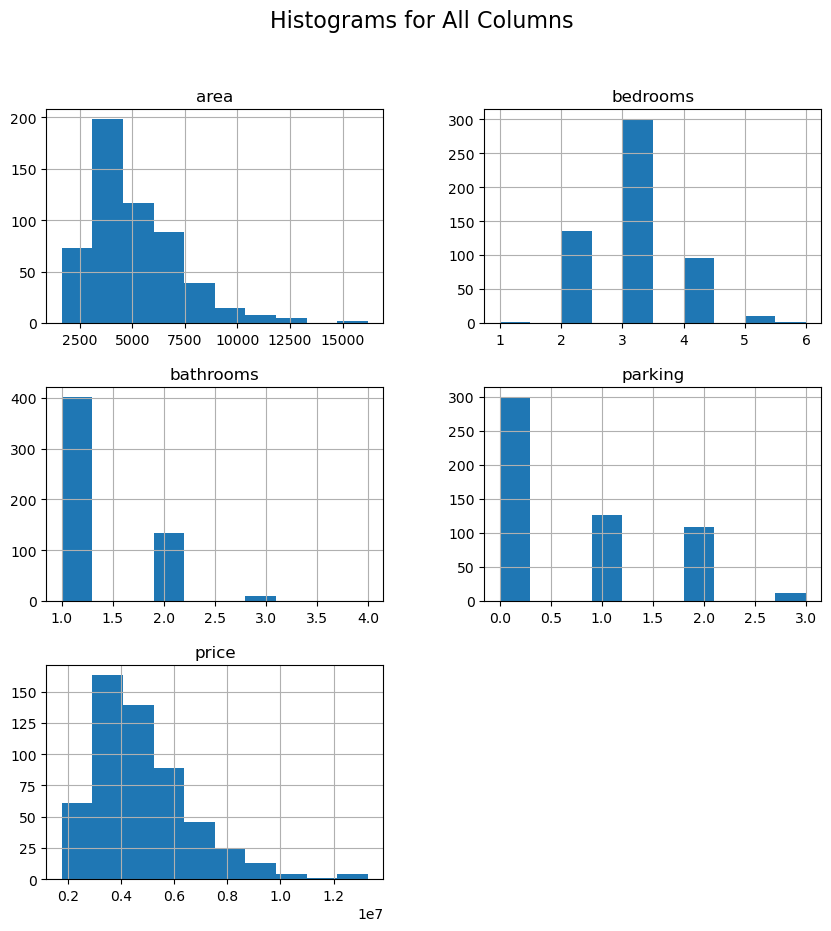

In [9]:
# Histogram For columns 'area', 'bedrooms', 'parking' Vs price
data.hist(figsize=(10, 10), bins=10)
plt.suptitle("Histograms for All Columns", fontsize=16) 
plt.show()


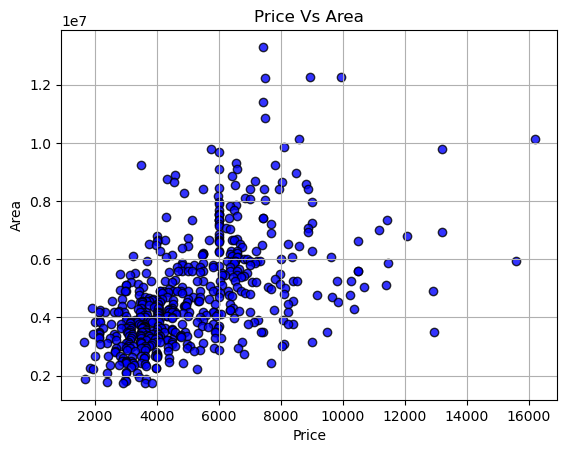

In [10]:
x = data['area']
y = data['price']

plt.scatter(x, y, color='blue', alpha=0.8, edgecolors='k')
plt.xlabel("Price")
plt.ylabel("Area")
plt.title("Price Vs Area")
plt.grid(True)

plt.show()

# Data preprocessing 

In [11]:
# Change the Categorical column to 0, 1
categorical_column =data[['mainroad','guestroom','basement','hotwaterheating','airconditioning','furnishingstatus']]

le =LabelEncoder()
label_encoders  = {col: le for col in categorical_column}

for col in categorical_column:
    data[col] = label_encoders[col].fit_transform(data[col])
    
data.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,price
0,7420,4,2,1,0,0,0,1,2,0,13300000
1,8960,4,4,1,0,0,0,1,3,0,12250000
2,9960,3,2,1,0,1,0,0,2,1,12250000
3,7500,4,2,1,0,1,0,1,3,0,12215000
4,7420,4,1,1,1,1,0,1,2,0,11410000


In [12]:
# Normalize numerical columns (Simplify large numbers)
numerical_column = data[['price', 'area' ,'parking','bathrooms','bedrooms']]
scaler = StandardScaler()
data[numerical_column.columns] = scaler.fit_transform(numerical_column)
data.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,price
0,1.046726,1.403419,1.421812,1,0,0,0,1,1.517692,0,4.566365
1,1.757010,1.403419,5.405809,1,0,0,0,1,2.679409,0,4.004484
2,2.218232,0.047278,1.421812,1,0,1,0,0,1.517692,1,4.004484
3,1.083624,1.403419,1.421812,1,0,1,0,1,2.679409,0,3.985755
4,1.046726,1.403419,-0.570187,1,1,1,0,1,1.517692,0,3.554979


# Create model

In [34]:
# Split Data 
# Features and target variable
X = data.drop(['price'], axis=1)  # Independent variables
y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Create model

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

data_model =pd.DataFrame(data={"Predicted Price ": y_pred.flatten()})
data_model.head()

,Predicted Price
0,0.173632
1,0.982304
2,-0.755496
3,0.023472
4,-0.496616


In [36]:
# Test Model
testing_data_model_score = model.score(x_test ,y_test)
print("Model Score /Performance on Testing data", testing_data_model_score)

traning_data_model_score = model.score(x_train ,y_train)
print("Model Score /Performance on traning data", traning_data_model_score)

Model Score /Performance on Testing data 0.5901596734708551
Model Score /Performance on traning data 0.6398269281118498


In [38]:
y_test = y_test.to_numpy() 

data_model =pd.DataFrame(data={"Predicted Value": y_pred.flatten(), 'Actual Value':y_test.flatten()})
data_model.head()

,Predicted Value,Actual Value
0,0.173632,-0.378188
1,0.982304,1.007785
2,-0.755496,-0.565482
3,0.023472,0.895409
4,-0.496616,-1.052446


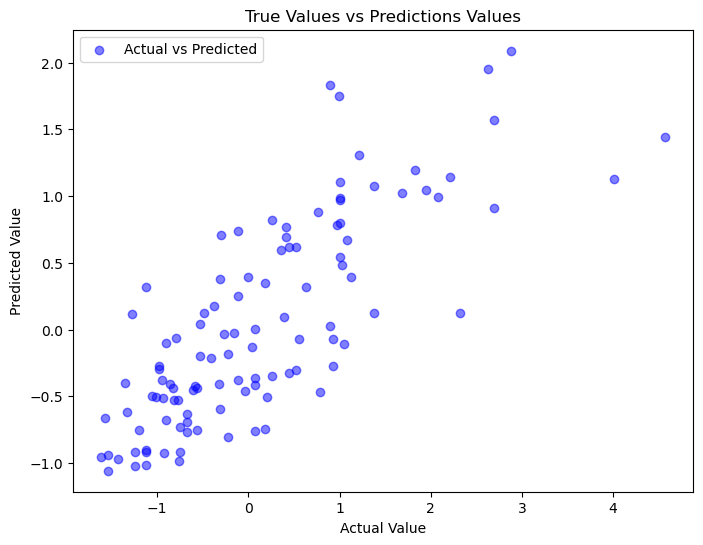

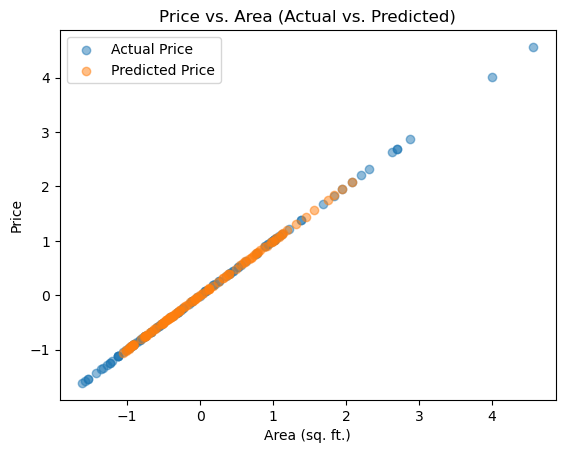

In [39]:
plt.figure(figsize=(8, 6))

plt.scatter(data_model['Actual Value'], data_model['Predicted Value'], color='blue', alpha=0.5, label="Actual vs Predicted")

plt.title('True Values vs Predictions Values')

plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.show()

# Plot the actual and predicted prices
plt.scatter(data_model['Actual Value'], y_test, label="Actual Price", alpha=0.5)
plt.scatter(data_model['Predicted Value'], y_pred, label="Predicted Price", alpha=0.5)
plt.title("Price vs. Area (Actual vs. Predicted)")
plt.xlabel("Area (sq. ft.)")
plt.ylabel("Price")
plt.legend()
plt.show()

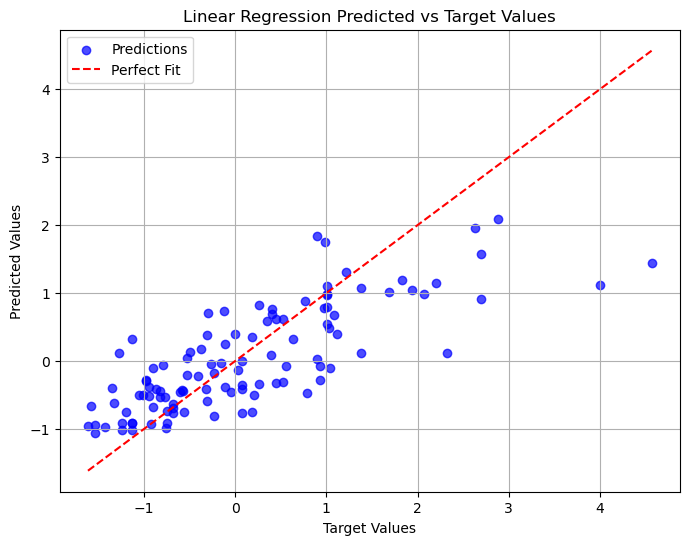

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel('Target Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Predicted vs Target Values')
plt.legend()
plt.grid(True)

plt.show()

In [41]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-Squared (R2): {r2:.2f}")


Model Performance Metrics:
Mean Squared Error (MSE): 0.59
Mean Absolute Error (MAE): 0.57
R-Squared (R2): 0.59


# Save Model

In [42]:
import pickle

# Save the model to a file
with open('model/linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)